<img src="logo.png" style="width:200px">

# <span style='font-family:Ubuntu'>Rapport de Projet d'Analyse Numérique(Groupe 4)</span>
## <span style='font-family:Ubuntu'><u>Thème:</u> Détermination du pH d’un acide faible et méthodes de continuation</span>

### <div><span style='font-family:Ubuntu'><u>Auteur:</u> Sinclair TSANA (Etudiant en BAB2)$\hspace{200px}$ <u>Enseignant:</u> Mr. Christophe TROESTLER</span></div>

## __Objectifs du projet:__

Dans ce projet, il est question d'aborder un problème concret grâce aux techniques numériques vues au cours qui pourrons être adaptées de manière à répondre à la série des 11 questions proposées.

## __Résultats attendues:__

> 1. Un bref rapport écrit qui résume les développements mathématiques et les solutions apportées aux problèmes posées
> 2. Les conclusions des expériences numériques.

__Note:__ Ce [notebook](https://jupyter.org/) constitut une réponse à ces deux points. Nous y présenterons à la fois le `code python` ainsi que les détails de nos développements mathématiques.

## __Importation des librairies nécessaires__

In [1]:
import matplotlib.pyplot as plt   # pour les representations graphiques
import math                       # contient les fonctions mathematiques usuels tels que log, sin, etc...
import random
import array
import numpy as np                # pour les calculs numeriques
from sympy import *               # pour les calculs symboliques
from math import log10
from scipy.optimize import brentq 
from scipy.integrate import solve_ivp
from numpy.linalg import inv

On s'intéresse à la variation du pH d’une solution aqueuse d’un acide faible AH (formé d’un atome d’hydrogène H et d’une autre partie notée A) en fonction de $−log_{10}c$ où $c >0$ représente la concentration de l’acide. L’analyse de ce problème conduit aux équations suivantes :

$$
\left\{
    \begin{array}{ll}
        [H_3O^+][OH^-]=k_e \hspace{100px}    (1) \\
        [H_3O^+]=[OH^-]+[A^-]  \hspace{65px}(2) \\
        [AH]k_a=[A^-][H_3O^+] \hspace{80px} (3) \\
        [AH]+[A^-]=c        \hspace{125px}   (4) 
    \end{array}
\right.
$$
## __Question 1__
### __1.a)  Détermination du polynôme__

On procède par élimination successive de $[OH^-], [A^-]$ et $[AH]$ des équations ci-dessus.

$(1)\Rightarrow[OH^-]=\frac{k_e}{[H_3O^+]}$

Dans (2) on a: $\hspace{40px}[H_3O^+]=\frac{k_e}{[H_3O^+]}+[A^-] \iff[A^-]=[H_3O^+]-\frac{k_e}{[H_3O^+]} \hspace{40px}(*)$
    
Dans (3) on a: $\hspace{40px}[AH]=\frac{1}{k_a}([H_3O^+]^2-k_e$
   
Dans (4) on a: $\hspace{40px}[A^-]=c-\frac{1}{k_a}([H_3O^+]^2-k_e)\hspace{40px}(**)$
    
$(*)$ et $(**)$ donnent: $\hspace{40px}[H_3O^+]-\frac{k_e}{[H_3O^+]}=c-\frac{1}{k_a}([H_3O^+]^2-k_e)$
    
En multipliant par $k_a[H_3O^+]$, on obtient: $\hspace{40px}k_a[H_3O^+]^2-k_ak_e = ck_a[H_3O^+]-[H_3O^+]^3+k_e[H_3O^+]$

$\hspace{250px}\iff [H_3O^+]^3+k_a[H_3O^+]-(ck_a[H_3O^+]+k_e[H_3O^+])-k_ak_e=0$
    
D'ou l'équation $X^3+k_aX^2-(k_e+ck_a)X-k_ak_e=0$ Où X représente la concentration en $H_3O^+$

### __Montrons que le polynôme P possède une unique racine positive.__

On a:$\hspace{40px}P(x) = x^3+k_ax^2-(k_e+ck_a)x-k_ak_e$

Trouver les racines de P c'est résoudre l'équation $x^3+k_ax^2-(k_e+ck_a)x-k_ak_e=0$

$P(x)=0 \iff x=(-k_ax^2+(ck_a+k_e)x+k_ak_e)^{1/3}$

Posons $\hspace{40px}f(x)=-k_ax^2+(ck_a+k_e)x+k_ak_e$

- __Etudions les variations de la fonction $f$__

    On a: $\hspace{40px}f^{'}(x)=-2k_ax+ck_a+k_e$

    $f^{'}(x)=0 \iff x=x_1=\frac{ck_a+k_e}{k_a}>\frac{k_e}{k_a}>0\hspace{40px}, \hspace{40px}f^{"}(x)=-2k_a<0 $ pour tout x réel positif.


   Ainsi $\forall x\geq 0$, on a $f^{'}(x)\leq ck_a+k_e\hspace{40px}$ et $\hspace{40px}\forall x\in [0,x_1]$, on a $k_ak_e\leq f(x)\leq f(x_1)$

   Posons $F(x)=(f(x))^{1/3}$, on a $F^{'}(x)=\frac{1}{3}f^{'}(x)(f(x))^{-2/3}\leq \frac{1}{3}(ck_a+k_e)(f(x))^{-2/3}$

Or, f est à valeurs strictement positives sur $[0,x_1]$ et la fonction $x:\longmapsto x^{-2/3}$ étant décroissante sur $]0,+\infty[$, donc la fonction $g:x\longmapsto (f(x))^{-2/3}$ est bornée su $[0,x_1]$. Pour tout $0\leq x \leq x_1$, on a  $g(0)\geq g(x) \geq g(x_1)$. Donc g est majorée sur $[0,x_1]$ par:<br>
<br>
$g(0)=(f(0))^{-2/3}$ et on a $f(0)=k_ak_e$.

Ce qui nous donne $F^{'}(x)\leq K$ où $K=\frac{1}{3}(ck_a+k_e)(k_ak_e)^{-2/3}$.

Ainsi, d'après le [__Théorème des Accroissements Finis__](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_des_accroissements_finis?oldformat=true), on a :

$\forall x,y \in [0,x_1] \hspace{40px} \lvert F(x)-F(y) \rvert \leq K\lvert x-y \rvert$

$K\leq 1 \iff \frac{1}{3}.(ck_a+k_e)(k_ak_e)^{-2/3}\leq 1 \iff ck_a+k_e \leq 3(k_ak_e)^{2/3}\iff c\leq \frac{3}{k_a}.((k_ak_e)^{2/3}-k_e)$

Posons $c_1 = \frac{3}{k_a}.((k_ak_e)^{2/3}-k_e)$

Donc la fonction F est K-Lipschitzienne sur $[0,x_1]$ et en particulier elle est contractant sur $[0,x_1]$ lorsque $c\in [0, c_1]$ 

Il en découle que F admet un unique point fixe. Autrement dit l'équation $F(x)=x$, qui est équivalente à $P(x)=0$, admet une unique solution sur $[0,x_1]$

In [2]:
# Quelques valeurs particulières
k_a = 1.8*10**(-5)     # Constante d’acidité  propre à l’acide
k_e = 1.0116*10**(-14) # La constante ionique de l’eau
c1 = (3/k_a)*((k_a*k_e)**(2/3)-k_e) # tels que posée ci-dessus
x1_c1 = c1 + k_e/k_a    # valeur de x1 pour c<=c1
c1, x1_c1

(5.1857032777617826e-08, 5.241903277761783e-08)

### __1.b) Algorithme de Horner pour évaluer P__

On considère le polynôme $P(x)=a_nx^n+a_{n-1}x^{n-1}+...+a_1x^1+a_0$

__La [méthode de Horner](https://en.wikipedia.org/wiki/Horner%27s_method?oldformat=true) consiste a écrire P(x) sous la forme $P_1(x).x+a_0$ et de repéter cette opération sur $P_1$ et ainsi de suite jusqu'a obtenir le polynôme constant $P_n(x)=a_n$__. Son implémentation en python est la suivante:

In [3]:
def horner(A,x): # A est le vecteur contenant les coefficients (a_i)_{i=0...n}
    n = len(A)-1
    p = A[n]
    i = n
    for i in range(n-1,0,-1):
        p = p*x + A[i]
    return p

### __1.c) Test de l'Algorithme de Horner et méthode des invariants__

In [4]:
c = random.uniform(0,1) # On génère un nbre aléatoire entre 0 et 1 pour tester notre fonction
A = [-k_a*k_e,-(k_e+c*k_a), k_a,1]

In [5]:
horner(A,0)== -k_a*k_e # on teste l'image de 0
horner(A,1)== sum(A)   # on teste l'image de 1

True

### __Méthode des invariants__
__Un invariant de boucle est une propriéte Q qui vérifie:__
- __Est vraie avant l'entrée dans la boucle.__
- __Est toujours vraie après chaque itération de la boucle.__
- __Vaut la propriéte P desiree a la fin de l'exécution de la boucle.__

#### __Cas de l'Algorithme de Horner__

Notons $A_n=\{a_0,a_1,...,a_n\}$ et $P_i = horner(A_i,x)$
> __Invariant de boucle:__ A chaque itération i, on a: <br>
$P_i=A_nx^{n-i}+A{_{n-i-1}}x^{n-1}+...+A_{i+1}x+A_i=\sum_{j=0}^{n-i}A_{n-j}x^{n-i-j}$

##### __Preuve__:

- __Avant la boucle__, $i = n$
> On a $P_i = \sum_{j=0}^{n-n}A_{n-j}x^{n-i-j}=A_n$
- Montrons que à chaque prochaine itération $inew$, on a $horner(A_{inew},x)\Rightarrow horner(A_{iold},x)\hspace{10px}$ où  $\hspace{10px}iold $ est l'itération précédente

> $P_{iold}= (A_nx^{n-iold}+A_{n-1}x^{n-iold-1}+...+A_{iold})x+A_{iold-1}$ <br>
>        $= A_nx^{n-iold+1}+A_{n-1}x^{n-iold}+...+A_{iold}x+A_{iold-1}$ <br>
>        $= A_nx^{n-inew}+A_{n-1}x^{n-inew-1}+...+A_{inew+1}x+A_{inew}$ <br>
>        $=\sum_{j=0}^{n-inew}A_{n-j}x^{n-inew-j}$
>        $=P_{inew}$

>Autrement dit, à chaque itération i, on a $P_i = horner(A_i,x) \Rightarrow P_{i-1} = horner(A_{i-1},x)$

- Après la boucle, $i=0$ et on a bien $P_{0}(X)=a_nx^{n}+a_{n-1}x^{i-1}+...+a_{1}x+a_0$

**Les étapes de l'algorithme de Horner sont les suivantes:**
<p>
    $
    \\
    \left.
        \begin{array}{ll}
             P_{n}(X)=a_nX \\
             P_{n-1}(X)=P_{n}X+a_{n-1}=a_{n}x+a_{n-1} \\
             \vdots \\
             P_{1}(X)=P_{2}X+a_{1}=a_nx^{n-1}+a_{n-2}x^{n-2}+...+a_{2}x+a_1\\
             P_{0}(X)=P_{1}X+a_{0}=a_nx^{n}+a_{n-1}x^{n-1}+...+a_{1}x+a_0\\
        \end{array}
    \right \} n-multiplications
    $
<p>
n décroit jusqu'a 0 et à la fin on a bien le résultat désiré $P(X)= a_nx^{n}+a_{n-1}x^{n-1}+...+a_{1}x+a_0$ <br> 

### __1.d) Valeurs de $c>0$ en fonction de $k_e$ et $k_a$ pour que $[H_3O^+]\leqslant 1$__

D'après la question (1-a), on a :

$[A^-]=[H_3O^+]-\frac{k_e}{[H_3O^+]} \hspace{40px}(*)$

et $[A^-]=c-\frac{1}{k_a}([H_3O^+]^2-k_e)\hspace{40px}(**)$


$\hspace{40px}[H_3O+]\leqslant 1 \iff \frac{1}{[H_3O+]}\geq 1 \iff \frac{k_e}{[H_3O+]}\geq k_e \iff -\frac{k_e}{[H_3O+]}\leqslant -k_e \iff [H_3O^+]-\frac{k_e}{[H_3O+]}\leqslant -k_e+[H_3O^+]\leqslant 1-k_e$

Ainsi,on a $\hspace{40px}[H_3O^+]\leqslant 1 \iff [H_3O^+]-\frac{k_e}{[H_3O+]}\leqslant -k_e+[H_3O^+]\leqslant 1-k_e$

$(*)$ devient $\hspace{40px}[A^-]\leqslant 1-k_e$

Dans $(**)$, on obtient:$\hspace{40px}c-\frac{1}{k_a}([H_3O^+]^2-k_e)\leqslant 1-k_e$

$\hspace{135px}\iff c\leqslant 1-k_e+\frac{1}{k_a}[H_3O^+]^2-\frac{k_e}{k_a}$

En majorant $[H_3O^+]$ par 1, on obtient $c\leqslant 1-k_e+\frac{1}{k_a}-\frac{k_e}{k_a}=\frac{(1-k_e)(1+k_a)}{k_a}$

On a finalement:
__$c \in ]0,\frac{(1-k_e)(1+k_a)}{k_a}]$__

### __e) Représentation du polynôme p sur [0;0.005] pour c $\in${${1., 0.1,0.01,10^{-12}}$}__

In [6]:
C = np.array([1.,0.1, 0.01, 10**(-12)])
coefs = [] # vecteur contenant les coefficients du polynôme pour les différentes valeurs de C
for i in C:
    res = np.array([-k_a*k_e, -(k_e+i*k_a), k_a, 1])
    coefs.append(res)
    coefs

In [7]:
coefs

[array([-1.82088e-19, -1.80000e-05,  1.80000e-05,  1.00000e+00]),
 array([-1.82088000e-19, -1.80000001e-06,  1.80000000e-05,  1.00000000e+00]),
 array([-1.8208800e-19, -1.8000001e-07,  1.8000000e-05,  1.0000000e+00]),
 array([-1.82088e-19, -1.01340e-14,  1.80000e-05,  1.00000e+00])]

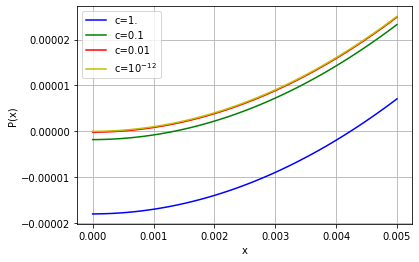

In [8]:
x = np.linspace(0,0.005, 100)
px1 = [];px2 = [];px3 = [];px4 = []; # initialisation des vecteurs  qui recevront les valeurs des polynômes
for i in range(len(x)):
    px1.append(horner(coefs[0],x[i]))
    px2.append(horner(coefs[1],x[i]))
    px3.append(horner(coefs[2],x[i]))
    px4.append(horner(coefs[3],x[i]))

px = [px1,px2,px3,px4]
colors = ['b','g','r','y']
labs = ["c=1.","c=0.1", "c=0.01", "c=$10^{-12}$"]

for i in range(0,4):
    plt.plot(x,px[i],color=colors[i],label=labs[i])
    
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid()
plt.legend()
plt.show()

### __1.f) Courbe du PH en fonction de ${-log_{10}c}$__

A partir de la suite $x_{n+1}=x_n+h\frac{f'(x_n)}{f(x_n)}$, on écris une routine qui, avec un pas constant h, détermine le point de la prochaine itération.

In [9]:
def nextPoint(x0,fx0,fprim_x0,h=10**(-10)): # fonctionne dans notre cas à partir de h = 10**(-3)
    xnext = x0+h*fprim_x0/fx0
    return xnext

In [10]:
C = np.linspace(0,1, 100)
coef3 = [] # vecteur contenant le 3e coéfficient du polynôme pour les différentes valeurs de C
for i in C:
    coef3.append((k_e+i*k_a))
    coef3

racines = [] 
n=len(coef3)-1
xnext = 1+1.0e-15 # on initialise par une valeur non nulle très proche de zero
for i in range(n,-1,-1):
    f = lambda x: x**3+k_a*x**2-coef3[i]*x-k_a*k_e
    fp = lambda x: 3*(x**2)-2*k_a*x-coef3[i]
    xnext = nextPoint(xnext,f(xnext),fp(xnext))
    res = brentq(f, 0, xnext) 
    racines.append(res)

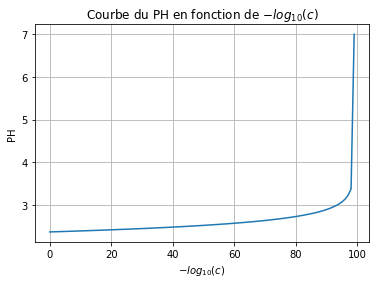

In [11]:
x = [-log10(r) for r in racines]
plt.plot(x)
plt.title("Courbe du PH en fonction de $-log_{10}(c)$")
plt.xlabel("$-log_{10}(c)$")
plt.ylabel("PH")
plt.grid()
plt.show()

**Explications:**

>On remarque que PH est une fonction croissante de $-log_{10}(c)$. Ce qui signifie que lorsque $-log_{10}(c)$ augmente(ie. c diminue), le PH augmente aussi.

>Ce qui __n'est pas logique d'un point de vue chimique__ puisque pour un acide, le PH décroit en fonction de sa concentration. En effet, plus la concentration en ions oxonium est faible, plus le pH augmente et plus la solution est basique. Inversement, plus la concentration en ions oxonium est importante, plus le pH diminue et plus la solution est acide.

### __1.g) Preuve des propriétés constatées graphiquement__

- __Continuité__:

Nous avons montré à la question (a) que pour tout réel $c \in ]0,c_1]$, la fonction $p(c,.)$ est Contractante sur $[0,x_1]$. Ainsi d'apres le théorème du point fixe sur $\mathbb{R}$, il existe une application $\gamma :]0,c_1]\longmapsto [0,x_1]$ telle que pour tout $c\in ]0,c_1], \gamma (c)$ soit l'unique point fixe de $p(c,.)$.

De plus, comme la fonction $c \longmapsto p(c,x)$ est continue pour tout $x\in [0,1]$, on en déduit que la fonction $\gamma$ est également continue .

- __Monotonie__:


- __Dérivabilité__:


### __Preuve que pH $\longrightarrow -log_{10}\sqrt{k_e}\approx 7$ lorsque $c\longrightarrow 0$__

Lorsque $c\longrightarrow 0$, notre équation de départ devient $X^3+k_{a}X^2-k_{e}X+k_ak_e=0$.

Posons $Q(X)=X^3+k_{a}X^2-k_{e}X+k_ak_e$, on remarque que $Q(-k_a)=0$

Grace à cette racine, on obtient la forme factorisée suivante : $Q(X)= (X+k_a)(X^2-k_e)$

Donc $Q(X)=0 \iff X+k_a=0$ ou $X^2-k_e=0$
$\iff X=-k_a$ ou $X= \pm \sqrt{k_e}$

Mais $X>0$, on a donc $X = \sqrt(k_e)$

Ainsi,lorsque $c\longrightarrow 0$, on a $[H_3O^+] \longrightarrow \sqrt(k_e)$.

Et comme $pH = -log_{10}[H_3O^+]$

On en déduit que $pH \longrightarrow -log_{10}\sqrt{k_e}$ lorsque $c\longrightarrow 0$

## __Question 2: Adapdation de la méthode du point fixe__

- __Montrons que la suite $(x_n)_{n\in \mathbb{N}}$ est de Cauchy:__

Soit $x_0 \in B$, comme B est stable par $\varphi(c,.)$ par défintiion de $\varphi(c,.)$, on peut poser $x_n = \varphi(c,x_{n-1})$ pour tout $n \in \mathbb{N}^*$

On a alors:

$\left\lVert x_{n+1}-x_n \right\rVert = \left\lVert \varphi(c,x_n) -\varphi(c,x_{n-1})\right\rVert \leqslant L\left\lVert x_n-x_{n-1}\right\rVert$


On obtient par récurrence sur n que <br>

$\left\lVert \varphi(c,x_{n+1}) -\varphi(c,x_{n})\right\rVert \leqslant L^n \left\lVert x_1-x_{0}\right\rVert$

Ainsi, pour tout $n\in \mathbb{N}$ et $k \in \mathbb{N}^*$, on a :

$\left\lVert x_{n+k} -x_{n})\right\rVert \leqslant \sum_{i=0}^{k-1} \left\lVert x_{n+i+1}-x_{n+i}\right\rVert$. <br>

$\hspace{100px}\leqslant \sum_{i=0}^{k-1} L^{n+i}\left\lVert x_{1}-x_{0}\right\rVert$

$\hspace{100px}\leqslant \left\lVert x_{1}-x_{0}\right\rVert \sum_{i=0}^{k-1} L^{n+i}$

$\hspace{100px}\leqslant L^n\frac{1-L^k}{1-L}\left\lVert x_{1}-x_{0}\right\rVert \hspace{10px}$

$\hspace{100px}\leqslant \frac{L^n}{1-L}\left\lVert x_{1}-x_{0}\right\rVert \longrightarrow 0$ quand n $\longrightarrow +\infty$ car $0<L<1$ 
<br>

Ainsi la suite $(x_n)_{n \in \mathbb{N}}$ est de Cauchy. 

- __Convergence:__

Comme $\mathbb{R}^n$ est complet, alors il existe $x^* \in  \mathbb{R}$ tel que $x_n \longrightarrow x^*$.

De plus comme B est fermé, cette limite $x^* \in B$ et $\forall n\in \mathbb{N}$, on a $x_{n+1}=\varphi(c,x_n)$

Par ailleurs, en utilisant la continuité de $\varphi(c,.)$ et en passant à la limite, on a $x^*=lim_{n \longrightarrow +\infty}x_{n+1}=lim_{n \longrightarrow +\infty} \varphi (c,x_n)=\varphi (c, lim_{n \longrightarrow +\infty} x_n)=\varphi (c,x^*)$

- __Unicité:__

Soit $L\in ]0,1[$ tel que:

$\forall c\in I, \forall x_1,x_2 \in B \left\lVert \varphi(c,x_1) -\varphi(c,x_2)\right\rVert \leqslant L\left\lVert x_1-x_2\right\rVert$

Supposons que x et y sont deux points fixes de $\varphi (c,.)$, alors on a:

$\left\lVert x-y \right\lvert=\left\lVert \varphi (c,x)-\varphi(c,y) \right\lvert \leqslant L\left\lVert x-y \right\lvert$ ce qui implique $\left\lVert x-y \right\lvert(1-L) \leqslant 0$

Mais on a $1-L>0$ car $L\in ]0,1[$

Donc $\left\lVert x-y \right\lvert=0$ et donc x=y. D'ou l'unicité de $x^*$

On peut ainsi définir la fonction $\gamma:I\longrightarrow B$

$c\longmapsto$ l'unique $x^*$ tel que $x^*=\varphi (c,x^*)$

## __Question 3: Montrons que la fonction $\varphi$ vérifie les hypothèses du théorème du point fixe__

On sait que pour tout $c\in I$, la fonction $\varphi(c,.)$ est continue sur B

De plus, l'hypothèse (a) nous dit que $\partial _x \varphi (c,x)$ existe en tout point $c\in I$ et $x\in B$

Ces deux hypothèses montrent que pour tout $c\in I$ la fonction __$\varphi(c,.)$ est de classe $C^1$ sur B__

Sous ces hypothèses, le __Théorème des Accroissement Finis__ nous assure que pour tout $x_1, x_2\in B$:

$\left\lVert \varphi (c,x_1)-\varphi(c,x_2) \right\lVert \leqslant \left\lVert x_1-x_2 \right\lVert \sup_{x\in intB}\left\lVert \partial _x \varphi(c,x) \right\lVert$ <br>

$\hspace{150px}\leqslant \left\lVert x_1-x_2 \right\lVert \sup_{c\in I}(\sup_{x\in intB}\left\lVert \partial _x \varphi(c,x) \right\lVert)$

$\hspace{150px}< \left\lVert x_1-x_2 \right\lVert  \hspace{50px} $ Car $\sup_{c\in I}(\sup_{x\in intB}\left\lVert \partial _x \varphi(c,x) \right\lVert)<1$ d'après l'hypothèse (b)

## __Question 4: Preuve du Théorème des fonctions implicites__

__Etape 1:__ Montrons que la fonction $\varphi$ est différentiable dans un voisinage approprié de $(c_0,x_0)$.

- __Montrons que la fonction $\gamma = \varphi (c,.)$ est Lipschitzienne__

Comme $\frac{\partial f}{\partial x}(c,.)$ est continue en $c_0$, alors $\frac{\partial \varphi}{\partial x}(c,.)$ l'est aussi.

Soit $q \in ]0,1[$, on a ,par définition de la continuité de $\frac{\partial \varphi}{\partial x}$ au point $c_0$,qu'il existe $r>0$ et $R>0$ tel que:

$\forall x \in B, \left\lVert c-c_0 \right\lVert \leqslant r$,$\left\lVert x-c_0 \right\lVert \leqslant R \implies \left\lVert \frac{\partial \varphi}{\partial x}(c,x)-\frac{\partial \varphi}{\partial x}(c_0,c_0)\right\lVert \leqslant q \hspace{50px}$ $(i)$

Par définition de la continuité de $\gamma$ au point $c_0$,on a que:

Pour tout $\epsilon >0, $il existe $\delta >0$ tel que: $\left\lVert c-c_0 \right\lVert \leqslant \delta \implies \left\lVert\gamma (c)-\gamma (c_0)\right\lVert=\left\lVert \varphi (c,c_0)-\varphi (c_0,c_0)\right\lVert \leqslant \epsilon \hspace{50px}$

En particulier pour $\epsilon = R(1-q)$, on a :$\left\lVert c-c_0 \right\lVert \leqslant \delta \implies \left\lVert\gamma (c)-\gamma (c_0)\right\lVert=\left\lVert \varphi (c,c_0)-\varphi (c_0,c_0)\right\lVert \leqslant R(1-q) \hspace{50px}$

Posons $r_0 = min(r,\delta)$,on a:

$\left\lVert c-c_0 \right\lVert \leqslant r_0$,$\left\lVert x-c_0 \right\lVert \leqslant R \implies \left\lVert\gamma (x)-\gamma (c_0)\right\lVert \leqslant \left\lVert \varphi (c,x)-\varphi(c,c_0) \right\lVert +\left\lVert \varphi (c,c_0)-\varphi(c_0,c_0) \right\lVert$

$\hspace{200px}\implies \left\lVert\gamma (c)-\gamma (c_0)\right\lVert\leqslant q\left\lVert x-c_0 \right\lVert +R(1-q) \hspace{80px}$ d'après $(i)$ et le TAF

$\hspace{200px}\implies \left\lVert\gamma (c)-\gamma (c_0)\right\lVert\leqslant qR+R(1-q)=R$

Ainsi, $\left\lVert\gamma (c)-\gamma (c_0)\right\lVert _\infty= \sup{\{\left\lVert\varphi (c,x)-\varphi (c_0,c_0)\right\lVert, \left\lVert x-c_0 \right\lVert \leqslant r_0}\}$

Et pour tout $x_1,x_2\in B(c_0,R)$, on a:

$\left\lVert\gamma (x_1)-\gamma (x_2) \right\lVert _\infty= \sup{\{\left\lVert\varphi (c,x_1)-\varphi (c,x_2)\right\lVert, \left\lVert x-c_0 \right\lVert \leqslant r_0}\}$

$\hspace{130px}\leqslant q\sup{ \{ \left\lVert x_1 -x_2 \right\lVert, \left\lVert x-c_0 \right\lVert \leqslant r_0 \} }$ d'après (i) et le TAF

$\hspace{130px}\leqslant q \left\lVert x_1 -x_2 \right\lVert _\infty$

Donc la fonction $\gamma$ est Lipschitzienne.

La fonction $\gamma$ est continue et dérivable pour tout $c\in B(c_0,R)$.Ce qui nous permet de dire que la fonction $\varphi$ est __différentiable__ pour tout $(c,x)\in B(c_0,r)$x$B(c_0,R)$

__Etape 2:__ montrons que $\varphi$ est lipschitzienne.

On a $\varphi(c,x)=x-(\partial _x f(c_0,c_0))^{-1}(\frac{\partial f}{\partial x}(c,x))$

Ainsi, pour tout $(c,x)\in B(c_0,r)$ x $B(c_0,R)$,$\frac{\partial \varphi}{\partial x}(c,x)$ existe et on a:

$\frac{\partial \varphi}{\partial x}(c,x)=I_2-(\partial _x f(c_0,c_0))^{-1}(\frac{\partial f}{\partial x}(c,x))$ où $I_2: \mathbb{R}^2 \longrightarrow \mathbb{R}$ est l'application identité.

Au point $c_0$, on a: $\frac{\partial \varphi}{\partial x}(c_0,c_0)=I_2-(\partial _x f(c_0,c_0))^{-1}(\frac{\partial f}{\partial x}(c_0,c_0))=0$

Donc $\frac{\partial \varphi}{\partial x}(c_0,c_0)=0$ et (i) devient:


$\forall x \in B \left\lVert c-c_0 \right\lVert \leqslant r,\left\lVert x-c_0 \right\lVert \leqslant R \implies \left\lVert \frac{\partial \varphi}{\partial x}(c,x)\right\lVert \leqslant q \hspace{50px}$ 

Ainsi d'après le Théorème des Accroissements Finis, on a:

$\forall x_1, x_2 \in B$,$\left\lVert c-c_0 \right\lVert \leqslant r$,$\left\lVert x-c_0 \right\lVert \leqslant R \implies \left\lVert \varphi (c,x_1)-\varphi(c,x_2) \right\lVert \leqslant q \left\lVert x_1-x_2 \right\lVert $

Donc la fonction $\varphi$ est Lipschitzienne.

On conclut que la fonction $\varphi (c,x)$ vérifie (3)

## __Question 5:Preuve d'existence d'un prolongement maximal par le Lemme de Zorn__

Soit $\gamma _0$ uner appliication telle que $\forall c\in I_0, f(c,\gamma(c_0))=0$.

Soit $\gamma : I\longmapsto \mathbb{R}^N$ un prolongement de $\gamma _0$, on a:

> (a) $I \supseteq I_0$ <br>
> (b) $\forall c\in I_0, \gamma(c)=\gamma _0(c)$

Soit E l'ensemble des fonctions qui prolongent $\gamma$.

Munissons cet ensemble de la relation "$\subseteq$" de sorte que pour $f,g \in E, f\subseteq g$ sinigfie qu'il existe un intervalle dans lequel $f=g$

Alors $(E,\subseteq)$ ensemble inductif i.e pout tout $i\neq j$ il existe $\gamma _i$ et $\gamma _j$ dans E tels que $\gamma _i \subseteq \gamma _j$

Le [lemme de Zorn](https://en.wikipedia.org/wiki/Zorn%27s_lemma?oldformat=true) nous assure que l'ensemble E ainsi définit admet un élément maximal.

## __Question 6:__

Supposons qu'il existe deux extensions $\gamma _1:I_1 \longmapsto \mathbb{R}^N$ et $\gamma _2:I_2 \longmapsto \mathbb{R}^N$ de $\gamma _0$; avec $I_1, I_2\subset[0,1]$

Supposons que $\gamma _1 \subseteq \gamma _2$

On a pour tout $(c,x)\in \Omega f(c,\gamma _1(c))=0$ et $f(c,\gamma _2(c))=0$

Par la règle de dérivation en chaine, on obtient:

$\frac{\partial f}{\partial c}(c,\gamma _1(c))+\frac{\partial f}{\partial x}(c,\gamma _1(c)).\partial _c \gamma _1(c)=0$

et $\frac{\partial f}{\partial c}(c,\gamma _2(c))+\frac{\partial f}{\partial x}(c,\gamma _2(c)).\partial _c \gamma _2(c)=0$

Equivaut à:

$\partial _c \gamma _1(c)=-(\frac{\partial f}{\partial x}(c,\gamma _1(c)))^{-1}(\frac{\partial f}{\partial c}(c,\gamma _1(c)))$

et $\partial _c \gamma _2(c)=-(\frac{\partial f}{\partial x}(c,\gamma _2(c)))^{-1}(\frac{\partial f}{\partial c}(c,\gamma _2(c)))$

(Preuve non terminée)

## __Question 7:__

Sous les hypothèses du Théorème des Fonctions Implicites, 

En effet la fonction $c\in I\longmapsto f(c,\gamma (c))$ étant différentiable comme composée de fonctions différentiables, la [règle de dérivation par chaine](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_de_d%C3%A9rivation_des_fonctions_compos%C3%A9es?oldformat=true)(chain rule) assure qu'en tout point de $\Omega$:

$\frac{\partial f}{\partial c}(c,\gamma (c))+\frac{\partial f}{\partial x}(c,\gamma (c)).\partial _c \gamma (c)=0 \iff \partial _c \gamma (c)=(\frac{\partial f}{\partial x}(c,\gamma (c)))^{-1}.\frac{\partial f}{\partial c}(c,c)$

## __Question 8:__ Routine pour la Résolution de l'EDO

In [13]:
f = lambda c,x: x**3+k_a*x**2-(c*k_a+k_e)*x-k_a*k_e  # Polynome P(c,x)
dfdc = lambda c,x: -k_a*x                            # dérivée partielle de P par rapport à c
dfdx = lambda c,x: 3*x**2+2*k_a*x-(c*k_a+k_e)        # dérivée partielle de P par rapport à x

In [14]:
def Routine(x0 = 10**(-8)):
    def gama(c,x):      #définition de la fonction
        if dfdx(c,x)==0:    # Traitement du cas ou dfdx n'est pas inversible
            try:
                c = c - float(c)/dfdx(x)
            except ZeroDivisionError:
                print("Erreur! - dérivée nulle pour c = ", c)
        return -dfdc(c,x)/dfdx(c,x)
    points = np.linspace(0,1,100) # points d'évaluation
    sol = solve_ivp(fun=gama,t_span=[0, 1], y0=[x0],t_eval=points)
    return sol.y

In [15]:
Routine();

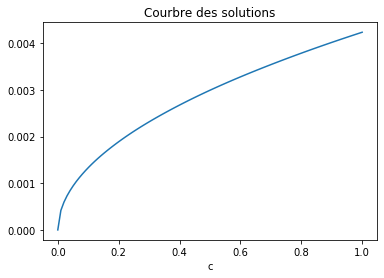

In [16]:
c = np.linspace(0,1,100) # points d'évaluation
gama = Routine().T        # transposée
plt.plot(c, gama)
plt.xlabel('c')
plt.title('Courbre des solutions')
plt.show()

## __Question 9:__ Influence des paramètres `rtol` et `atol` de `scipy.integrate:solve_ivp`

In [18]:
f = lambda c,x: x**3+k_a*x**2-(c*k_a+k_e)*x-k_a*k_e
c = np.linspace(0,1,100)
x=f(c,gama)
x1 = f(1,gama)
norm_f = np.linalg.norm(x,ord=2)
norm_f_c1 = np.linalg.norm(x1,ord=2)
norm_f, norm_f_c1

(1.9735368185305545e-06, 2.1857547068173576e-07)

## __Question 10:__

In [57]:
# Fonction pour determiner la matrice Jacobienne de h
def J(h, x, dx=1e-8):
    n = len(x)
    func = h((x))
    jac = np.zeros((n, n))
    for j in range(n):  # compteur sur les colonnes
        Dxj = (abs(x[j])*dx if x[j] != 0 else dx)
        x_plus = [(xi if k != j else xi + Dxj) for k, xi in enumerate(x)]
        jac[:, j] = (h(x_plus) - func)/Dxj
    return jac

In [ ]:
def newton(h,x0, tol, max_iter):
    for n in range(0,max_iter):
        hx0 = h(x0)
        if abs(hx0) < tol:
            print("solution trouvée après {} itérations.".format(n))
            return x0
        Jhxn = # A revoir
        if Jhxn == 0:
            print("Jacobienne Singulière. Pas de solution")
            return None
        xn = xn - hxn/Jhxn
    print("Aucune solution trouvée après {} itérations".format(max_iter))
    return None

## __Question 11:__

In [ ]:
# non terminee
def Newton(h,(x0), tol, max_iter):
    Jh = # matrice Jacobienne
    Jhx0 = Jh(x0)
    xtild = Routine(x0)   # approximation à l'ordre 0
    for n in range(0,max_iter):
        x = xtild + hx0/Jh(xtild)
        Jhxn = Jh(x)# A revoir
        hx = h(x)
        norm_h = np.linalg.norm(hx, ord=2)
        if abs(norm_h) > tol:
            continue
    return x

### __Conclusion:__

Il convient de rappeller que ce travail est proposé en vue d'une évaluation par mes encadreurs. Il est donc possible qu'il y ai quelques coquilles. Merci pour votre comprehension. 

### __Reférences:__

1. Cours [Introduction to Numerical Analysis and Statistical Modeling]() BAB2 Umons par Christophe Troestler  
2. [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html) by Qingkai Kong, Timmy Siauw, Alexandre Bayen (Authors)
3. Earl A. Coddington, Norman Levinson - [Theory of ordinary differential equations-R.E. Krieger]() (1984)
4. Wikipedia [Numerical differentiation](https://en.wikipedia.org/wiki/Numerical_differentiation?oldformat=true) et [Numerical methods for ordinary differential equations](https://en.wikipedia.org/w/index.php?title=Numerical_methods_for_ordinary_differential_equations&oldformat=true)